In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/world-population/2021_population.csv
/kaggle/input/world-population/timeseries_population_count.csv
/kaggle/input/covid-vaccination-dataset/vaccinations.csv


In [2]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from   plotly.subplots import make_subplots
from   plotly import subplots

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.offsetbox import TextArea,DrawingArea,OffsetImage,AnnotationBbox
from matplotlib.collections import PatchCollection
from matplotlib.patches import PathPatch
from matplotlib.patches import Polygon
from matplotlib import image
import seaborn as sns

# Read Vaccination Data

In [3]:
data_df = pd.read_csv('../input/covid-vaccination-dataset/vaccinations.csv')
data_df.head()


,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0


# Read Population Last Data From Population Data Set

In [4]:
population_df = pd.read_csv('../input/world-population/2021_population.csv',thousands=',')
population_df = population_df.sort_values(by='country')
population_df.head()

,iso_code,country,2021_last_updated,2020_population,area,density_sq_km,growth_rate,world_%,rank
36,AFG,Afghanistan,39929284,38928346,"652,230 sq_km",61/sq_km,2.33%,0.51%,37
139,ALB,Albania,2872370,2877797,"28,748 sq_km",100/sq_km,-0.17%,0.04%,140
33,DZA,Algeria,44694125,43851044,"2,381,741 sq_km",19/sq_km,1.75%,0.57%,34
205,ASM,American Samoa,55100,55191,199 sq_km,277/sq_km,-0.16%,0.00%,209
198,AND,Andorra,77355,77265,468 sq_km,165/sq_km,0.12%,0.00%,202


Parse Month and Data From Vaccination Data

In [5]:
data_df['month_year'] =pd.to_datetime(data_df['date']).dt.to_period('m')
data_df['month_year'] = data_df['month_year'].astype(str)


# Fetch Iran Vaccination Data from Vaccination Dataframe

In [6]:
iran_df = data_df.loc[data_df['iso_code']=='IRN']
iran_df.head()

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,month_year
16222,Iran,IRN,2021-02-08,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,2021-02
16223,Iran,IRN,2021-02-09,3000.0,3000.0,NaN,3000.0,3000.0,0.0,0.0,NaN,36.0,2021-02
16224,Iran,IRN,2021-02-10,NaN,NaN,NaN,NaN,1938.0,NaN,NaN,NaN,23.0,2021-02
16225,Iran,IRN,2021-02-11,NaN,NaN,NaN,NaN,1583.0,NaN,NaN,NaN,19.0,2021-02
16226,Iran,IRN,2021-02-12,NaN,NaN,NaN,NaN,1406.0,NaN,NaN,NaN,17.0,2021-02


In [7]:
#Get Iran Populatin from population DF
iran_population = population_df.loc[population_df['iso_code']=='IRN']['2021_last_updated']
iran_population = iran_population.iloc[0]

In [8]:
#Get Countries which have +/- 10 percent population compare with Iran
symmetic_countries = population_df.loc[(population_df['2021_last_updated'] < (iran_population * 1.1)) & (population_df['2021_last_updated'] >(iran_population * 0.9))]
symmetic_countries

,iso_code,country,2021_last_updated,2020_population,area,density_sq_km,growth_rate,world_%,rank
15,COD,Dr Congo,92667027,89561403,"2,344,858 sq_km",39/sq_km,3.14%,1.17%,16
18,DEU,Germany,83913565,83783942,"357,114 sq_km",235/sq_km,0.14%,1.07%,19
17,IRN,Iran,85132894,83992949,"1,648,195 sq_km",52/sq_km,1.23%,1.08%,18
16,TUR,Turkey,85119676,84339067,"783,562 sq_km",109/sq_km,0.83%,1.08%,17


# Neighbours Countries  & Countries with same Population 

In [9]:
neighbours = ["AFG","SUA","ARE","IRQ",'AZE',"TUR","QAT","PAK","ARM","TKM","IRN"]
neighbor_countries = population_df.loc[population_df['iso_code'].isin(neighbours)]
neighbor_countries
symmetric= ['COD','DEU',"IRN","TUR"]
same_population = population_df.loc[population_df["iso_code"].isin(symmetric)]


# Compare Vaccination Trend

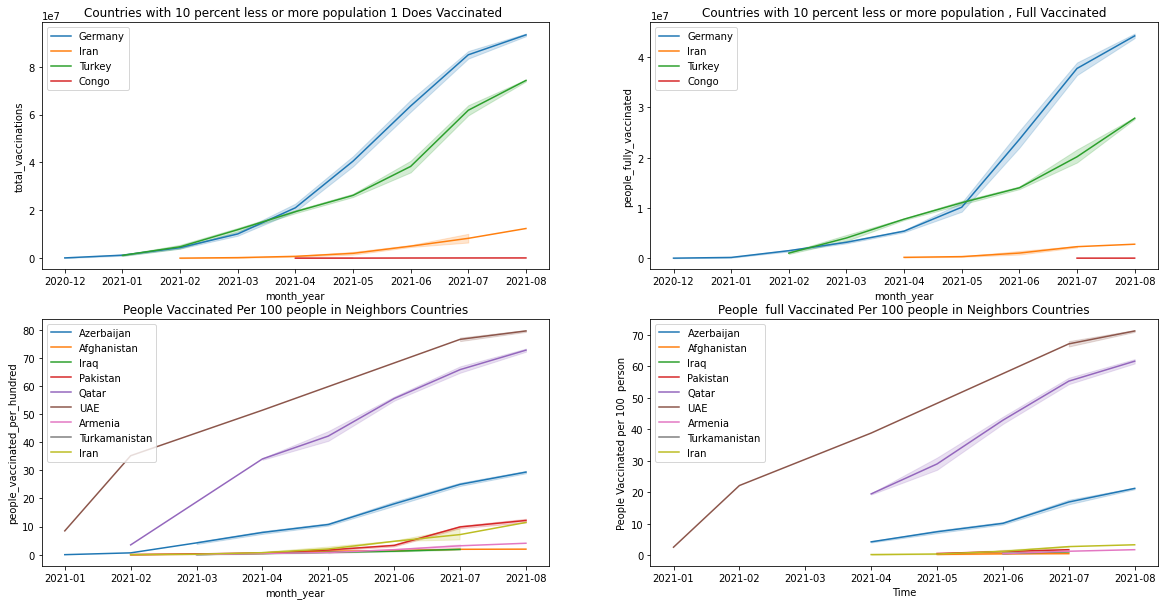

In [10]:
german_df = data_df.loc[data_df['iso_code']=='DEU']
turkey_df = data_df.loc[data_df['iso_code']=='TUR']
congo_df  = data_df.loc[data_df['iso_code']=='COD']
azer_df = data_df.loc[data_df['iso_code']=='AZE']
afghan_df = data_df.loc[data_df['iso_code']=='AFG']
iraq_df = data_df.loc[data_df['iso_code']=='IRQ']
pakistan_df = data_df.loc[data_df['iso_code']=='PAK']
qatar_df = data_df.loc[data_df['iso_code']=='QAT']
saudi_df = data_df.loc[data_df['iso_code']=='SUA']
uae_df = data_df.loc[data_df['iso_code']=='ARE']
armenia_df = data_df.loc[data_df['iso_code']=="ARM"]
turkaman_df = data_df.loc[data_df['iso_code']=="TKM"]

fig,axes = plt.subplots(ncols=2 , nrows =2 ,figsize=(20,10))

sns.lineplot(y= german_df['total_vaccinations'],x=german_df['month_year'],label ="Germany",ax=axes[0,0])
sns.lineplot(y= iran_df['total_vaccinations'],x=iran_df['month_year'],label="Iran",ax=axes[0,0])
sns.lineplot(y= turkey_df['total_vaccinations'],x=turkey_df['month_year'],label ="Turkey",ax=axes[0,0])
sns.lineplot(y= congo_df['total_vaccinations'],x=congo_df['month_year'],label ="Congo",ax=axes[0,0])
axes[0,0].set_title("Countries with 10 percent less or more population 1 Does Vaccinated ")

sns.lineplot(y= german_df['people_fully_vaccinated'],x=german_df['month_year'],label ="Germany",ax=axes[0,1])
sns.lineplot(y= iran_df['people_fully_vaccinated'],x=iran_df['month_year'],label="Iran",ax=axes[0,1])
sns.lineplot(y= turkey_df['people_fully_vaccinated'],x=turkey_df['month_year'],label ="Turkey",ax=axes[0,1])
sns.lineplot(y= congo_df['people_fully_vaccinated'],x=congo_df['month_year'],label ="Congo",ax=axes[0,1])
axes[0,1].set_title("Countries with 10 percent less or more population , Full Vaccinated")

sns.lineplot(y= azer_df['people_vaccinated_per_hundred'],x=azer_df['month_year'],label ="Azerbaijan",ax=axes[1,0])
sns.lineplot(y= afghan_df['people_vaccinated_per_hundred'],x=afghan_df['month_year'],label ="Afghanistan",ax=axes[1,0])
sns.lineplot(y= iraq_df['people_vaccinated_per_hundred'],x=iraq_df['month_year'],label ="Iraq",ax=axes[1,0])
sns.lineplot(y= pakistan_df['people_vaccinated_per_hundred'],x=pakistan_df['month_year'],label ="Pakistan",ax=axes[1,0])
sns.lineplot(y= qatar_df['people_vaccinated_per_hundred'],x=qatar_df['month_year'],label ="Qatar",ax=axes[1,0])
sns.lineplot(y= saudi_df['people_vaccinated_per_hundred'],x=saudi_df['month_year'],label ="Saudi Arabia",ax=axes[1,0])
sns.lineplot(y= uae_df['people_vaccinated_per_hundred'],x=uae_df['month_year'],label ="UAE",ax=axes[1,0])
sns.lineplot(y= armenia_df['people_vaccinated_per_hundred'],x=armenia_df['month_year'],label ="Armenia",ax=axes[1,0])
sns.lineplot(y= turkaman_df['people_vaccinated_per_hundred'],x=turkaman_df['month_year'],label ="Turkamanistan",ax=axes[1,0])
sns.lineplot(y= iran_df['people_vaccinated_per_hundred'],x=iran_df['month_year'],label="Iran",ax=axes[1,0])
axes[1,0].set_title("People Vaccinated Per 100 people in Neighbors Countries")
plt.xlabel("Time")
plt.ylabel("People Vaccinated per 100  person")

sns.lineplot(y= azer_df['people_fully_vaccinated_per_hundred'],x=azer_df['month_year'],label ="Azerbaijan",ax=axes[1,1])
sns.lineplot(y= afghan_df['people_fully_vaccinated_per_hundred'],x=afghan_df['month_year'],label ="Afghanistan",ax=axes[1,1])
sns.lineplot(y= iraq_df['people_fully_vaccinated_per_hundred'],x=iraq_df['month_year'],label ="Iraq",ax=axes[1,1])
sns.lineplot(y= pakistan_df['people_fully_vaccinated_per_hundred'],x=pakistan_df['month_year'],label ="Pakistan",ax=axes[1,1])
sns.lineplot(y= qatar_df['people_fully_vaccinated_per_hundred'],x=qatar_df['month_year'],label ="Qatar",ax=axes[1,1])
sns.lineplot(y= saudi_df['people_fully_vaccinated_per_hundred'],x=saudi_df['month_year'],label ="Saudi Arabia",ax=axes[1,1])
sns.lineplot(y= uae_df['people_fully_vaccinated_per_hundred'],x=uae_df['month_year'],label ="UAE",ax=axes[1,1])
sns.lineplot(y= armenia_df['people_fully_vaccinated_per_hundred'],x=armenia_df['month_year'],label ="Armenia",ax=axes[1,1])
sns.lineplot(y= turkaman_df['people_fully_vaccinated_per_hundred'],x=turkaman_df['month_year'],label ="Turkamanistan",ax=axes[1,1])
sns.lineplot(y= iran_df['people_fully_vaccinated_per_hundred'],x=iran_df['month_year'],label="Iran",ax=axes[1,1])
axes[1,1].set_title("People  full Vaccinated Per 100 people in Neighbors Countries")
plt.xlabel("Time")
plt.ylabel("People Vaccinated per 100  person")

plt.savefig("subplots1.jpg",bbox_inches='tight',dpi=300,facecolor='w')

due to huge diifrent in polpulation total vaccination is not good enoughf measure so we wilol compare them with new measurment : people vaccinated for each 100 person 

# Get Accumulative data & last updated staus

Merge both datasets to Create Uniqe dataset on common field = country IS0_Code

In [11]:
accumulatives = ['iso_code','total_vaccinations','people_vaccinated','people_fully_vaccinated','total_vaccinations_per_hundred','people_vaccinated_per_hundred','month_year']
acc_df =data_df[accumulatives]
country_breif = ["iso_code","country","2021_last_updated"]
country_final = population_df[country_breif]
acc_df = pd.merge(country_final,acc_df,on="iso_code")
acc_df.rename(columns={'2021_last_updated':'Population'},inplace=True)


In [12]:
last_data = acc_df.groupby('iso_code').max().sort_values("total_vaccinations",ascending=False).dropna(subset=['total_vaccinations'])
last_data.head()

,country,Population,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_vaccinations_per_hundred,people_vaccinated_per_hundred,month_year
iso_code,,,,,,,,
CHN,China,1444712023,1.757780e+09,622000000.0,223299000.0,122.13,43.21,2021-08
IND,India,1394784323,5.010096e+08,390041560.0,110968049.0,36.30,28.26,2021-08
USA,United States,333114077,3.497875e+08,193764457.0,165918256.0,104.59,57.94,2021-08
BRA,Brazil,214139548,1.494698e+08,109376148.0,44266214.0,70.32,51.46,2021-08
JPN,Japan,126007590,9.965109e+07,58095553.0,41555539.0,78.79,45.93,2021-08


In [13]:
most_doses_vaccinated = last_data.sort_values(by='people_vaccinated',ascending=False).iloc[0:15]
most_fully_vaccinated = last_data.sort_values(by='people_fully_vaccinated',ascending=False).iloc[0:15]
total_vaccination_per_hundred = last_data.sort_values(by='total_vaccinations_per_hundred',ascending=False).iloc[:15]
total_vaccination_per_hundred =  total_vaccination_per_hundred.set_index('country')
people_vaccinated_per_hundred = last_data.sort_values(by="people_vaccinated_per_hundred",ascending=False).iloc[:15]
people_vaccinated_per_hundred= people_vaccinated_per_hundred.set_index('country')

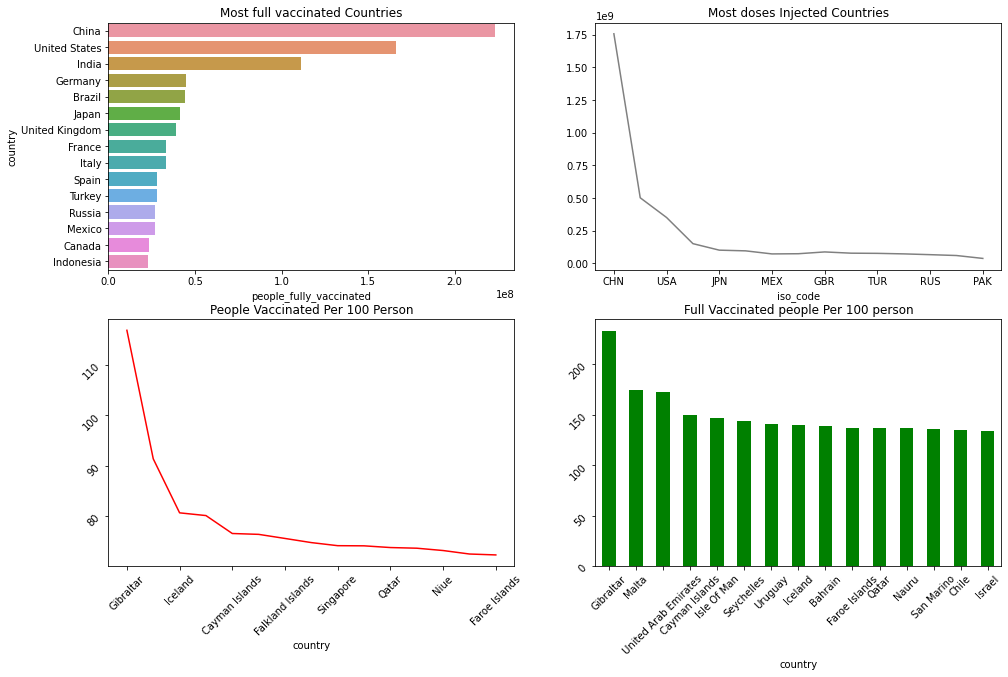

In [14]:
fig ,axes = plt.subplots(ncols=2,nrows=2,figsize=(16,10))
# most_fully_vaccinated['people_fully_vaccinated'].plot(ax = axes[0,0],kind='bar')
sns.barplot(data=most_fully_vaccinated,x="people_fully_vaccinated",y="country",ax=axes[0,0])
axes[0,0].set_title("Most full vaccinated Countries")
most_doses_vaccinated['total_vaccinations'].plot(ax=axes[0,1],color="grey")
axes[0,1].set_title("Most doses Injected Countries")
total_vaccination_per_hundred['total_vaccinations_per_hundred'].plot(ax=axes[1,1],kind="bar",color="green")
axes[1,1].set_title("Full Vaccinated people Per 100 person")
axes[1,1].tick_params(labelrotation=45)
people_vaccinated_per_hundred['people_vaccinated_per_hundred'].plot(ax=axes[1,0],color ='red')
axes[1,0].tick_params(labelrotation=45)
axes[1,0].set_title("People Vaccinated Per 100 Person")
plt.savefig("subplots2.jpeg",facecolor='w',dpi=300)

# Vaccination Percentage

In [15]:
last_data['vaccinated_percent'] = last_data.people_vaccinated / last_data.Population * 100
last_data['full_vaccinated_percent'] = last_data.people_fully_vaccinated /last_data.Population * 100
neighbor_countries = last_data.loc[last_data.index.isin(neighbours)]
same_population = last_data.loc[last_data.index.isin(symmetric)]

In [16]:
neighbor_countries =neighbor_countries.sort_values(by="vaccinated_percent",ascending=False)
same_population = same_population.sort_values(by="vaccinated_percent",ascending=False)
last_data = last_data.sort_values(by="vaccinated_percent",ascending=False)
last_data_temp = last_data[:15]
same_population.reset_index(inplace=True)
neighbor_countries.reset_index(inplace=True)
last_data.reset_index(inplace=True)
last_data_temp.reset_index(inplace=True)

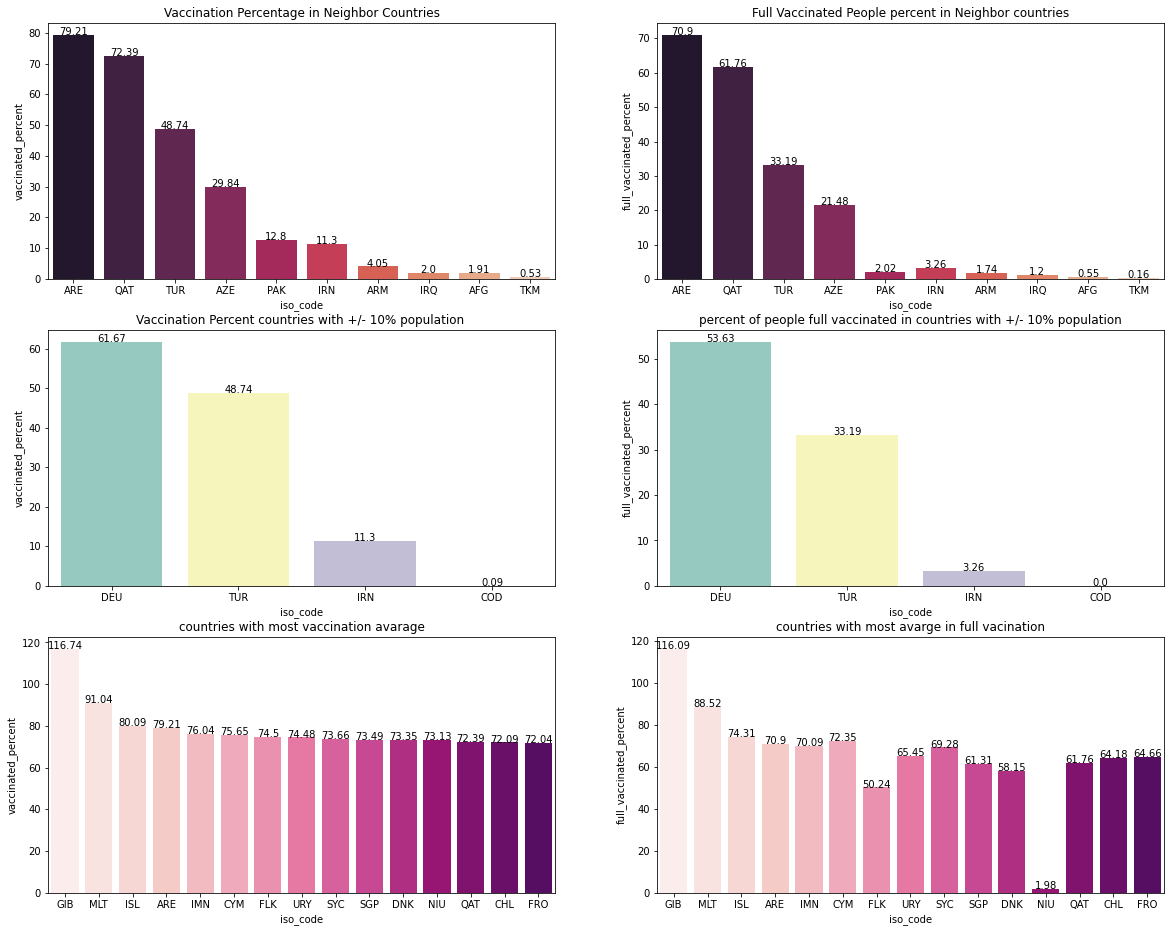

In [17]:
fig,axes =plt.subplots(nrows=3 ,ncols=2,figsize=(20,16))
bar1 = sns.barplot(data=neighbor_countries,x="iso_code",y='vaccinated_percent',ax=axes[0,0],palette="rocket")
bar1.set_title("Vaccination Percentage in Neighbor Countries")
for index,row  in neighbor_countries.iterrows():
    bar1.text(row.name,row.vaccinated_percent,round(row.vaccinated_percent,2),color='black', ha="center")
    
bar2 = sns.barplot(data=neighbor_countries,x='iso_code',y='full_vaccinated_percent',ax=axes[0,1],palette="rocket")
bar2.set_title("Full Vaccinated People percent in Neighbor countries")
for index,row  in neighbor_countries.iterrows():
    bar2.text(row.name,row.full_vaccinated_percent,round(row.full_vaccinated_percent,2),color='black', ha="center")

bar3 = sns.barplot(data=same_population,x="iso_code",y='vaccinated_percent',ax=axes[1,0],palette="Set3")
bar3.set_title('Vaccination Percent countries with +/- 10% population ')
for index,row  in same_population.iterrows():
    bar3.text(row.name,row.vaccinated_percent,round(row.vaccinated_percent,2),color='black', ha="center")
    
    
bar4 = sns.barplot(data=same_population,x="iso_code",y='full_vaccinated_percent',ax=axes[1,1],palette="Set3")
bar4.set_title("percent of people full vaccinated in countries with +/- 10% population")
for index,row  in same_population.iterrows():
    bar4.text(row.name,row.full_vaccinated_percent,round(row.full_vaccinated_percent,2),color='black', ha="center")

bar5 =sns.barplot(data=last_data_temp,x="iso_code",y="vaccinated_percent",ax=axes[2,0],palette='RdPu')

bar5.set_title("countries with most vaccination avarage")
for index,row  in last_data_temp.iterrows():
    bar5.text(row.name,row.vaccinated_percent,round(row.vaccinated_percent,2),color='black', ha="center")


bar6 =sns.barplot(data=last_data_temp,x="iso_code",y="full_vaccinated_percent",ax=axes[2,1],palette='RdPu')
bar6.set_title("countries with most avarge in full vacination")
for index,row  in last_data_temp.iterrows():
    bar6.text(row.name,row.full_vaccinated_percent,round(row.full_vaccinated_percent,2),color='black', ha="center")


plt.savefig("subplots3.jpeg",dpi=300,facecolor='w')

In [18]:
fig=px.choropleth(last_data,locations="iso_code",color="vaccinated_percent",
                  hover_name="country",color_continuous_scale="balance",
                  projection="natural earth",range_color=[100,0],
                  title ='<span style="font-size:36px; font-family:Times New Roman">Percentage of People  Vaccinated</span>',)
fig.show()
fig.write_html("index.html")
